# Quantum Circuits

NOTE: this notebook follows the contents of chapter 05 of **Mastering Quantum Computing with IBM QX**. The original code is available at https://github.com/PacktPublishing/Mastering-Quantum-Computing-with-IBM-QX

In [1]:
%matplotlib inline
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import IBMQ

# IBMQ.save_account("put_your_token_here_and_uncommentb")
provider = IBMQ.load_account()

In [2]:
print("X|0⟩:")

qr = QuantumRegister(1)
circuit = QuantumCircuit(qr)
circuit.x(qr[0])
circuit.draw()

X|0⟩:


┌───┐
q0_0: |0>┤ X ├
         └───┘

In [3]:
print("XH|0⟩:")

qr = QuantumRegister(1)
circuit = QuantumCircuit(qr)
circuit.h(qr[0])
circuit.x(qr[0])
circuit.draw()

XH|0⟩:


┌───┐┌───┐
q1_0: |0>┤ H ├┤ X ├
         └───┘└───┘

In [4]:
print("CNOT|+0⟩:")

cr = ClassicalRegister(2)
qr = QuantumRegister(2)

circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])

# cx(control, target)
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)

circuit.draw()

CNOT|+0⟩:


┌───┐     ┌─┐   
q2_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q2_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c0_0: 0 ═══════════╩══╬═
                       ║ 
 c0_1: 0 ══════════════╩═

## Reversible circuit

In [5]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)

circuit = QuantumCircuit(qr, cr)
circuit.cx(qr[2],qr[1])
circuit.x(qr[1])
circuit.h(qr[2])
circuit.s(qr[3])
circuit.y(qr[4])
circuit.z(qr[3])
circuit.t(qr[2])
circuit.tdg(qr[2])
circuit.z(qr[3])

circuit.y(qr[4])
circuit.sdg(qr[3])
circuit.h(qr[2])
circuit.x(qr[1])
circuit.cx(qr[2],qr[1])

circuit.measure(qr, cr)
circuit.draw()

┌─┐                                 
q3_0: |0>─────┤M├─────────────────────────────────
         ┌───┐└╥┘┌───┐┌───┐            ┌───┐┌─┐   
q3_1: |0>┤ X ├─╫─┤ X ├┤ X ├────────────┤ X ├┤M├───
         └─┬─┘ ║ ├───┤├───┤┌─────┐┌───┐└─┬─┘└╥┘┌─┐
q3_2: |0>──■───╫─┤ H ├┤ T ├┤ Tdg ├┤ H ├──■───╫─┤M├
         ┌───┐ ║ ├───┤├───┤├─────┤└┬─┬┘      ║ └╥┘
q3_3: |0>┤ S ├─╫─┤ Z ├┤ Z ├┤ Sdg ├─┤M├───────╫──╫─
         ├───┤ ║ ├───┤└┬─┬┘└─────┘ └╥┘       ║  ║ 
q3_4: |0>┤ Y ├─╫─┤ Y ├─┤M├──────────╫────────╫──╫─
         └───┘ ║ └───┘ └╥┘          ║        ║  ║ 
 c1_0: 0 ══════╩════════╬═══════════╬════════╬══╬═
                        ║           ║        ║  ║ 
 c1_1: 0 ═══════════════╬═══════════╬════════╩══╬═
                        ║           ║           ║ 
 c1_2: 0 ═══════════════╬═══════════╬═══════════╩═
                        ║           ║             
 c1_3: 0 ═══════════════╬═══════════╩═════════════
                        ║                         
 c1_4: 0 ═══════════════╩═════════════════════════

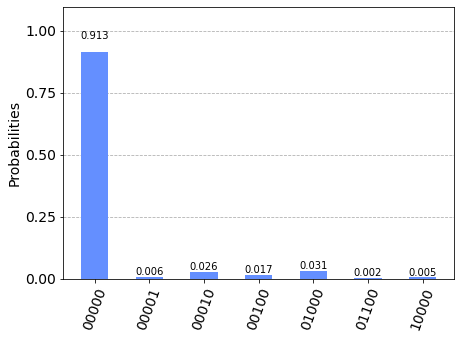

In [6]:
backend = provider.get_backend('ibmq_rome')
job = qiskit.execute(circuit, backend=backend)

from qiskit.tools.visualization import plot_histogram
plot_histogram(job.result().get_counts(circuit))

This result is not what we would have expected since all the transformations applied are reversed. Neverthless the presence of noise affects the measurement. The result |00000⟩ is found in a probabilistic sense.

## Swap of two qubits

1. Apply CNOT to |ab⟩:
CNOT|ab⟩ = |a,a⊕b⟩
2. Apply CNOT to the previus result swapping control and target qubits:
CNOT|a⊕b,a⟩ = |a⊕b,a⊕b⊕a⟩ = |a⊕b,b⟩
3. Apply CNOT to the previus result swapping again control and target qubits:
CNOT|b,a⊕b⟩ = |b,a⊕b⊕b⟩ = |ba⟩

In [7]:
qr = QuantumRegister(2)
circuit = QuantumCircuit(qr)

circuit.cx(qr[0], qr[1])
circuit.cx(qr[1], qr[0])
circuit.cx(qr[0], qr[1])

circuit.draw()

┌───┐     
q4_0: |0>──■──┤ X ├──■──
         ┌─┴─┐└─┬─┘┌─┴─┐
q4_1: |0>┤ X ├──■──┤ X ├
         └───┘     └───┘

# Exercises

## Exercise 01-04
Draw the quantum circuit that applies S<sup>†</sup> to |-⟩.

In [8]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='out')
circuit = QuantumCircuit(qr, cr)

circuit.x(qr[0])
circuit.h(qr[0])
circuit.sdg(qr[0])

circuit.measure(qr, cr)
circuit.draw()

┌───┐┌───┐┌─────┐┌─┐
 q_0: |0>┤ X ├┤ H ├┤ Sdg ├┤M├
         └───┘└───┘└─────┘└╥┘
out_0: 0 ══════════════════╩═

## Exercise 05
Measure a CNOT gate acting with control qubit of S<sup>†</sup>|-⟩ and a target of |0⟩.

In [9]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

circuit.x(qr[0])
circuit.h(qr[0])
circuit.sdg(qr[0])

circuit.cx(qr[0], qr[1])

circuit.measure(qr, cr)
circuit.draw()

┌───┐┌───┐┌─────┐     ┌─┐   
q5_0: |0>┤ X ├┤ H ├┤ Sdg ├──■──┤M├───
         └───┘└───┘└─────┘┌─┴─┐└╥┘┌─┐
q5_1: |0>─────────────────┤ X ├─╫─┤M├
                          └───┘ ║ └╥┘
 c2_0: 0 ═══════════════════════╩══╬═
                                   ║ 
 c2_1: 0 ══════════════════════════╩═

## Exercise 06
Reverse the computation of |v⟩ = XXYSZTS<sup>†</sup>HHTS|+⟩.

The expression can be simplified: |v⟩ = XXYSZTS<sup>†</sup>HHTS|+⟩ = YSZTS<sup>†</sup>TS|+⟩.

Then the inverse computation is given by: S<sup>†</sup>T<sup>†</sup>ST<sup>†</sup>ZS<sup>†</sup>Y|v⟩ = |+⟩.

Proof:

In [10]:
import numpy as np
np.set_printoptions(precision=3, suppress=True, floatmode='fixed', sign='+')

H = 1 / np.sqrt(2) * np.array([[1.0, 1.0],
                               [1.0, -1.0]], dtype=np.complex64)

X = np.array([[0, 1.0],
              [1.0, 0]], dtype=np.complex64)

Y = np.array([[0, -1j],
              [1j, 0]], dtype=np.complex64)

Z = np.array([[1.0, 0],
              [0, -1.0]], dtype=np.complex64)


def phase_shift(phi: np.real):
    return np.array([[1.0, 0],
                     [0, np.e ** (1.0j * phi)]], dtype=np.complex64)


S = phase_shift(np.pi / 2)
Sdg = phase_shift(-np.pi / 2)

T = phase_shift(np.pi / 4)
Tdg = phase_shift(-np.pi / 4)

plus_qubit = 1 / np.sqrt(2) * np.array([1.0+0.0j, 1+0.0j]).T

v = X @ X @ Y @ S @ Z @ T @ Sdg @ H @ H @ T @ S @ plus_qubit
inv = Sdg @ Tdg @ S @ Tdg @ Z @ Sdg @ Y

print(v)
print(inv @ v)

[+0.000-0.707j +0.000+0.707j]
[+0.707-0.000j +0.707+0.000j]


## Exercise 08
Prepare the |01011101⟩ state in an 8-qubit quantum circuit. Then perform a computation on the state using the gates of your choice. Next add gates to reverse your computation. Finally, imagine you measure each qubit in the |0⟩ and |1⟩ basis and place the result in a classical register. What would the register contain?

In [11]:
qr = QuantumRegister(8)
cr = ClassicalRegister(8)

circuit = QuantumCircuit(qr, cr)

# initial state
circuit.x(qr[1])
circuit.x(qr[3])
circuit.x(qr[4])
circuit.x(qr[5])
circuit.x(qr[7])

circuit.x(qr[0])
circuit.y(qr[0])
circuit.s(qr[0])
circuit.s(qr[0])
circuit.z(qr[0])
circuit.y(qr[0])
circuit.x(qr[0])

circuit.cx(qr[1], qr[2])
circuit.cx(qr[1], qr[2])

circuit.h(qr[3])
circuit.tdg(qr[3])
circuit.tdg(qr[3])
circuit.s(qr[3])
circuit.h(qr[3])

circuit.h(qr[4])
circuit.h(qr[4])

circuit.x(qr[5])
circuit.h(qr[5])
circuit.z(qr[5])
circuit.z(qr[5])
circuit.h(qr[5])
circuit.x(qr[5])

circuit.iden(qr[6])

circuit.x(qr[7])
circuit.x(qr[7])

circuit.measure(qr, cr)
circuit.draw()

┌───┐ ┌───┐ ┌───┐  ┌───┐ ┌───┐┌───┐┌───┐                  ┌─┐   
q6_0: |0>┤ X ├─┤ Y ├─┤ S ├──┤ S ├─┤ Z ├┤ Y ├┤ X ├──────────────────┤M├───
         ├───┤ └───┘ └───┘  └───┘ └┬─┬┘└───┘└───┘                  └╥┘   
q6_1: |0>┤ X ├───■─────■───────────┤M├──────────────────────────────╫────
         └───┘ ┌─┴─┐ ┌─┴─┐         └╥┘  ┌─┐                         ║    
q6_2: |0>──────┤ X ├─┤ X ├──────────╫───┤M├─────────────────────────╫────
         ┌───┐ ├───┤┌┴───┴┐┌─────┐  ║   └╥┘ ┌───┐┌───┐          ┌─┐ ║    
q6_3: |0>┤ X ├─┤ H ├┤ Tdg ├┤ Tdg ├──╫────╫──┤ S ├┤ H ├──────────┤M├─╫────
         ├───┤ ├───┤└┬───┬┘└─────┘  ║    ║  └┬─┬┘└───┘          └╥┘ ║    
q6_4: |0>┤ X ├─┤ H ├─┤ H ├──────────╫────╫───┤M├─────────────────╫──╫────
         ├───┤ ├───┤ ├───┤  ┌───┐   ║    ║   └╥┘ ┌───┐┌───┐┌───┐ ║  ║ ┌─┐
q6_5: |0>┤ X ├─┤ X ├─┤ H ├──┤ Z ├───╫────╫────╫──┤ Z ├┤ H ├┤ X ├─╫──╫─┤M├
         ├───┴┐└───┘ └┬─┬┘  └───┘   ║    ║    ║  └───┘└───┘└───┘ ║  ║ └╥┘
q6_6: |0>┤ Id ├───────┤M├───────────╫────╫────╫──────────────────╫──╫──╫─
         ├───┬┘┌───┐  └╥┘   ┌───┐   ║    ║    ║   ┌─┐            ║  ║  ║ 
q6_7: |0>┤ X ├─┤ X ├───╫────┤ X ├───╫────╫────╫───┤M├────────────╫──╫──╫─
         └───┘ └───┘   ║    └───┘   ║    ║    ║   └╥┘            ║  ║  ║ 
 c3_0: 0 ══════════════╬════════════╬════╬════╬════╬═════════════╬══╩══╬═
                       ║            ║    ║    ║    ║             ║     ║ 
 c3_1: 0 ══════════════╬════════════╩════╬════╬════╬═════════════╬═════╬═
                       ║                 ║    ║    ║             ║     ║ 
 c3_2: 0 ══════════════╬═════════════════╩════╬════╬═════════════╬═════╬═
                       ║                      ║    ║             ║     ║ 
 c3_3: 0 ══════════════╬══════════════════════╬════╬═════════════╩═════╬═
                       ║                      ║    ║                   ║ 
 c3_4: 0 ══════════════╬══════════════════════╩════╬═══════════════════╬═
                       ║                           ║                   ║ 
 c3_5: 0 ══════════════╬═══════════════════════════╬═══════════════════╩═
                       ║                           ║                     
 c3_6: 0 ══════════════╩═══════════════════════════╬═════════════════════
                                                   ║                     
 c3_7: 0 ══════════════════════════════════════════╩═════════════════════

In [ ]:
# use a quantum computer with at least 8 qubits
backend = provider.get_backend('ibmq_16_melbourne')
job = qiskit.execute(circuit, backend=backend)

In [14]:
job.result().get_counts(circuit)

{'10111010': 624,
 '00001010': 2,
 '11111010': 3,
 '10010010': 9,
 '00011000': 1,
 '00111000': 9,
 '10101000': 8,
 '00011010': 9,
 '00010010': 1,
 '10001010': 9,
 '00111010': 59,
 '10110000': 2,
 '10111011': 3,
 '10110010': 43,
 '10111110': 1,
 '10001110': 1,
 '10010110': 1,
 '11101010': 2,
 '10111000': 38,
 '10000010': 1,
 '10010000': 1,
 '00101000': 1,
 '11011010': 1,
 '10101010': 69,
 '00110010': 6,
 '10011000': 6,
 '10100000': 1,
 '10100010': 5,
 '00100010': 1,
 '00101010': 12,
 '10011010': 95}